In [55]:
import pandas as pd
data = pd.read_csv('./data.csv')

In [56]:
for column in data.columns:
    print(column, data[column].isnull().sum())

title 0
genres 0
product rating 1325
user score 1477
user ratings count 1872
platform 0
metascore 0
metascore_count 0
img 0
publisher 0
developer 2
critic_score 11086
total_sales 7307
na_sales 8248
jp_sales 13043
pal_sales 8174
other_sales 7518
release date 6
last_update 8326


In [57]:
# Set the allowable limit for missing values
allowable_limit = len(data) * 0.6  # You can adjust this threshold as per your preference

# Iterate over each column
for column in data.columns:
    # Count the missing values in each column
    missing_count = data[column].isnull().sum()

    # If missing values exceed the allowable limit, drop the column
    if missing_count > allowable_limit:
        data = data.drop(column, axis=1)
        print(f"Dropped column '{column}' due to exceeding allowable limit of missing values.")
    else:
        # For numerical columns, fill missing values with mean
        if data[column].dtype in ['int64', 'float64']:
            data.loc[:, column] = data[column].fillna(data[column].mean())
        else:
            data.loc[:, column] = data[column].fillna(data[column].mode()[0])


print("Missing values filled successfully.")
print(data)


Dropped column 'critic_score' due to exceeding allowable limit of missing values.
Dropped column 'jp_sales' due to exceeding allowable limit of missing values.
Missing values filled successfully.
                                  title                  genres  \
0                             4X4 EVO 2         Auto Racing Sim   
1                             4X4 EVO 2         Auto Racing Sim   
2                              Gothic 3             Western RPG   
3      Guitar Hero III: Legends of Rock                  Rhythm   
4      Guitar Hero III: Legends of Rock                  Rhythm   
...                                 ...                     ...   
15008                         Inversion    Third Person Shooter   
15009            Alice: Madness Returns                Survival   
15010            Alice: Madness Returns                Survival   
15011            Alice: Madness Returns                Survival   
15012                    Concrete Genie  Third-Person Adventure   


In [58]:
data

,title,genres,product rating,user score,user ratings count,platform,metascore,metascore_count,img,publisher,developer,total_sales,na_sales,pal_sales,other_sales,release date,last_update
0,4X4 EVO 2,Auto Racing Sim,Rated E For Everyone,6.960572,357.087969,XB,59,15,/games/boxart/5011937ccc.jpg,Gathering of Developers,Terminal Reality,0.240000,0.180000,0.050000,0.010000,11/14/2001,1/6/2018
1,4X4 EVO 2,Auto Racing Sim,Rated E For Everyone,6.960572,357.087969,GC,56,7,/games/boxart/6083195ccc.jpg,VU Games,Terminal Reality,0.140000,0.110000,0.030000,0.000000,9/9/2002,1/6/2018
2,Gothic 3,Western RPG,Rated T For Teen,7.500000,832.000000,PC,63,39,/games/boxart/3146876ccc.jpg,Aspyr,Piranha Bytes,0.520853,0.308538,0.188988,0.060511,11/14/2006,1/6/2018
3,Guitar Hero III: Legends of Rock,Rhythm,Rated T For Teen,8.400000,144.000000,Wii,86,36,/games/boxart/full_2081446AmericaFrontccc.jpg,RedOctane,Vicarious Visions,4.600000,3.040000,1.120000,0.440000,10/28/2007,1/6/2018
4,Guitar Hero III: Legends of Rock,Rhythm,Rated T For Teen,8.400000,144.000000,PS2,82,24,/games/boxart/full_5372169AmericaFrontccc.jpg,RedOctane,BudCat Creations,4.980000,3.490000,0.010000,1.480000,10/28/2007,1/6/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,Inversion,Third Person Shooter,Rated M For Mature,6.400000,81.000000,PS3,56,23,/games/boxart/full_inversion_773PALFront.jpg,Namco Bandai Games,Saber Interactive,0.070000,0.030000,0.030000,0.010000,6/5/2012,1/6/2018
15009,Alice: Madness Returns,Survival,Rated M For Mature,8.300000,276.000000,PC,75,29,/games/boxart/full_alice-madness-returns_416Am...,Electronic Arts,Spicy Horse,0.120000,0.308538,0.100000,0.010000,6/14/2011,1/6/2018
15010,Alice: Madness Returns,Survival,Rated M For Mature,8.300000,276.000000,PS3,70,51,/games/boxart/full_alice-madness-returns_955Am...,Electronic Arts,Spicy Horse,0.590000,0.220000,0.240000,0.080000,6/14/2011,1/6/2018
15011,Alice: Madness Returns,Survival,Rated M For Mature,8.300000,276.000000,X360,70,67,/games/boxart/full_alice-madness-returns_827Am...,Electronic Arts,Spicy Horse,0.500000,0.270000,0.150000,0.040000,6/14/2011,1/6/2018


In [59]:
max_value = data['total_sales'].max()
min_value = data['total_sales'].min()
for column in ['total_sales', 'na_sales', 'pal_sales', 'other_sales']:
    data[column] = 10 * (data[column] - min_value) / (max_value - min_value)

In [60]:
data['other_sales'] = data['total_sales'] - data['na_sales'] - data['pal_sales']

In [61]:
data['total score'] = data['user score'] * data['user ratings count']
max_value = data['total score'].max()
min_value = data['total score'].min()
data['total score'] = 10 * (data['total score'] - min_value) / (max_value - min_value)

In [62]:
for column in data.columns:
    if data[column].dtype == 'float64':
        data[column] = data[column].round(4)


In [63]:
data

,title,genres,product rating,user score,user ratings count,platform,metascore,metascore_count,img,publisher,developer,total_sales,na_sales,pal_sales,other_sales,release date,last_update,total score
0,4X4 EVO 2,Auto Racing Sim,Rated E For Everyone,6.9606,357.088,XB,59,15,/games/boxart/5011937ccc.jpg,Gathering of Developers,Terminal Reality,0.1181,0.0886,0.0246,0.0049,11/14/2001,1/6/2018,0.0262
1,4X4 EVO 2,Auto Racing Sim,Rated E For Everyone,6.9606,357.088,GC,56,7,/games/boxart/6083195ccc.jpg,VU Games,Terminal Reality,0.0689,0.0541,0.0148,0.0000,9/9/2002,1/6/2018,0.0262
2,Gothic 3,Western RPG,Rated T For Teen,7.5000,832.000,PC,63,39,/games/boxart/3146876ccc.jpg,Aspyr,Piranha Bytes,0.2563,0.1518,0.0930,0.0115,11/14/2006,1/6/2018,0.0658
3,Guitar Hero III: Legends of Rock,Rhythm,Rated T For Teen,8.4000,144.000,Wii,86,36,/games/boxart/full_2081446AmericaFrontccc.jpg,RedOctane,Vicarious Visions,2.2638,1.4961,0.5512,0.2165,10/28/2007,1/6/2018,0.0127
4,Guitar Hero III: Legends of Rock,Rhythm,Rated T For Teen,8.4000,144.000,PS2,82,24,/games/boxart/full_5372169AmericaFrontccc.jpg,RedOctane,BudCat Creations,2.4508,1.7175,0.0049,0.7283,10/28/2007,1/6/2018,0.0127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15008,Inversion,Third Person Shooter,Rated M For Mature,6.4000,81.000,PS3,56,23,/games/boxart/full_inversion_773PALFront.jpg,Namco Bandai Games,Saber Interactive,0.0344,0.0148,0.0148,0.0049,6/5/2012,1/6/2018,0.0055
15009,Alice: Madness Returns,Survival,Rated M For Mature,8.3000,276.000,PC,75,29,/games/boxart/full_alice-madness-returns_416Am...,Electronic Arts,Spicy Horse,0.0591,0.1518,0.0492,-0.1420,6/14/2011,1/6/2018,0.0241
15010,Alice: Madness Returns,Survival,Rated M For Mature,8.3000,276.000,PS3,70,51,/games/boxart/full_alice-madness-returns_955Am...,Electronic Arts,Spicy Horse,0.2904,0.1083,0.1181,0.0640,6/14/2011,1/6/2018,0.0241
15011,Alice: Madness Returns,Survival,Rated M For Mature,8.3000,276.000,X360,70,67,/games/boxart/full_alice-madness-returns_827Am...,Electronic Arts,Spicy Horse,0.2461,0.1329,0.0738,0.0394,6/14/2011,1/6/2018,0.0241


In [64]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

In [65]:
data = remove_outliers(data, 'na_sales')
data = remove_outliers(data, 'pal_sales')
data = remove_outliers(data, 'other_sales')
data = remove_outliers(data, 'total_sales')

In [66]:
data['score'] = pd.cut(data['total score'], bins=[0, 2.5, 5, 7.5, 10], labels=['*', '**', '***', '****'], include_lowest=True)

In [67]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

# Download NLTK resources
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')


# Function to tokenize text
def tokenize_text(text):
    if isinstance(text, str):
        tokens = word_tokenize(text)
        return tokens
    else:
        return []


# Function to apply stemming
def apply_stemming(tokens):
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens


# Function to apply lemmatization
def apply_lemmatization(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


# Function to remove stopwords
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens


In [68]:
# Tokenize, remove stopwords, stem, and lemmatize

columns_to_lemmatize = ['title', 'genres']
for col in columns_to_lemmatize:
    data[f'Processed_{col}'] = data[col].apply(tokenize_text)
    data[f'Processed_{col}'] = data[col].apply(remove_stopwords)
    data[f'Stemmed_{col}'] = data[col].apply(apply_stemming)
    data[f'Lemmatized_{col}'] = data[col].apply(apply_lemmatization)


In [69]:
data

,title,genres,product rating,user score,user ratings count,platform,metascore,metascore_count,img,publisher,...,release date,last_update,total score,score,Processed_title,Stemmed_title,Lemmatized_title,Processed_genres,Stemmed_genres,Lemmatized_genres
0,4X4 EVO 2,Auto Racing Sim,Rated E For Everyone,6.9606,357.088,XB,59,15,/games/boxart/5011937ccc.jpg,Gathering of Developers,...,11/14/2001,1/6/2018,0.0262,*,"[4, X, 4, , E, V, , 2]","[4, x, 4, , e, v, o, , 2]","[4, X, 4, , E, V, O, , 2]","[u, , R, c, n, g, ]","[a, u, t, o, , r, a, c, i, n, g, , s, i, m]","[A, u, t, o, , R, a, c, i, n, g, , S, i, m]"
1,4X4 EVO 2,Auto Racing Sim,Rated E For Everyone,6.9606,357.088,GC,56,7,/games/boxart/6083195ccc.jpg,VU Games,...,9/9/2002,1/6/2018,0.0262,*,"[4, X, 4, , E, V, , 2]","[4, x, 4, , e, v, o, , 2]","[4, X, 4, , E, V, O, , 2]","[u, , R, c, n, g, ]","[a, u, t, o, , r, a, c, i, n, g, , s, i, m]","[A, u, t, o, , R, a, c, i, n, g, , S, i, m]"
2,Gothic 3,Western RPG,Rated T For Teen,7.5000,832.000,PC,63,39,/games/boxart/3146876ccc.jpg,Aspyr,...,11/14/2006,1/6/2018,0.0658,*,"[G, h, c, , 3]","[g, o, t, h, i, c, , 3]","[G, o, t, h, i, c, , 3]","[W, e, e, r, n, , R, P, G]","[w, e, s, t, e, r, n, , r, p, g]","[W, e, s, t, e, r, n, , R, P, G]"
8,Xenoraid,Vertical Shoot-'Em-Up,Rated E +10 For Everyone +10,6.2000,6.000,NS,61,6,/games/boxart/full_5432569AmericaFrontccc.png,10tons Ltd,...,11/17/2017,3/26/2018,0.0004,*,"[X, e, n, r]","[x, e, n, o, r, a, i, d]","[X, e, n, o, r, a, i, d]","[V, e, r, c, l, , h, -, ', E, -, U, p]","[v, e, r, t, i, c, a, l, , s, h, o, o, t, -, ...","[V, e, r, t, i, c, a, l, , S, h, o, o, t, -, ..."
9,Retrovirus,FPS,Rated T For Teen,6.6000,20.000,PC,70,12,/games/boxart/full_139033AmericaFrontccc.jpg,Cadenza Interactive,...,1/31/2013,3/24/2019,0.0014,*,"[R, e, r, v, r, u]","[r, e, t, r, o, v, i, r, u, s]","[R, e, t, r, o, v, i, r, u, s]","[F, P]","[f, p, s]","[F, P, S]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15005,NASCAR Heat,Auto Racing Sim,Rated E For Everyone,3.6000,5.000,PS,62,5,/games/boxart/full_1295972AmericaFrontccc.jpg,Hasbro Interactive,...,11/6/2000,1/6/2018,0.0002,*,"[N, C, R, , H, e]","[n, a, s, c, a, r, , h, e, a, t]","[N, A, S, C, A, R, , H, e, a, t]","[u, , R, c, n, g, ]","[a, u, t, o, , r, a, c, i, n, g, , s, i, m]","[A, u, t, o, , R, a, c, i, n, g, , S, i, m]"
15006,Inversion,Third Person Shooter,Rated M For Mature,6.4000,81.000,PC,59,6,/games/boxart/full_inversion_460AmericaFront.jpg,Namco Bandai,...,6/30/2012,1/6/2018,0.0055,*,"[n, v, e, r, n]","[i, n, v, e, r, s, i, o, n]","[I, n, v, e, r, s, i, o, n]","[h, r, , P, e, r, n, , h, e, r]","[t, h, i, r, d, , p, e, r, s, o, n, , s, h, ...","[T, h, i, r, d, , P, e, r, s, o, n, , S, h, ..."
15007,Inversion,Third Person Shooter,Rated M For Mature,6.4000,81.000,X360,53,51,/games/boxart/full_inversion_418PALFront.jpg,Namco Bandai Games,...,6/5/2012,1/6/2018,0.0055,*,"[n, v, e, r, n]","[i, n, v, e, r, s, i, o, n]","[I, n, v, e, r, s, i, o, n]","[h, r, , P, e, r, n, , h, e, r]","[t, h, i, r, d, , p, e, r, s, o, n, , s, h, ...","[T, h, i, r, d, , P, e, r, s, o, n, , S, h, ..."
15008,Inversion,Third Person Shooter,Rated M For Mature,6.4000,81.000,PS3,56,23,/games/boxart/full_inversion_773PALFront.jpg,Namco Bandai Games,...,6/5/2012,1/6/2018,0.0055,*,"[n, v, e, r, n]","[i, n, v, e, r, s, i, o, n]","[I, n, v, e, r, s, i, o, n]","[h, r, , P, e, r, n, , h, e, r]","[t, h, i, r, d, , p, e, r, s, o, n, , s, h, ...","[T, h, i, r, d, , P, e, r, s, o, n, , S, h, ..."


In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

numerical = ['user score', 'user ratings count', 'metascore', 'metascore_count', 'total_sales',
             'na_sales', 'pal_sales', 'other_sales']
text = ['title', 'genres']
time = ['release date', 'last_update']
categorical = []
for i in numerical + text + time:
    if not i in list(data.columns):
        categorical.append(i)

def visualize(data, column):
    # Plot numerical data
    if column in numerical:
        plt.figure(figsize=(8, 4))
        sns.histplot(data[column], bins=5, kde=True)
        plt.title(f'Histogram of {column}')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

    # Plot categorical data
    elif column in categorical:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=column, data=data)
        plt.title(f'Count Plot of {column}')
        plt.xlabel('Category')
        plt.ylabel('Count')
        plt.show()

    elif column in time:
        data.set_index(column, inplace=True)
        plt.figure(figsize=(8, 4))
        data[column].plot()
        plt.title(f'Time Series {column}')
        plt.xlabel('Date')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()

    # Generate and plot a word cloud from text data
    else:
        txt = ' '.join(data[column])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(txt)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud of {column}')
        plt.show()


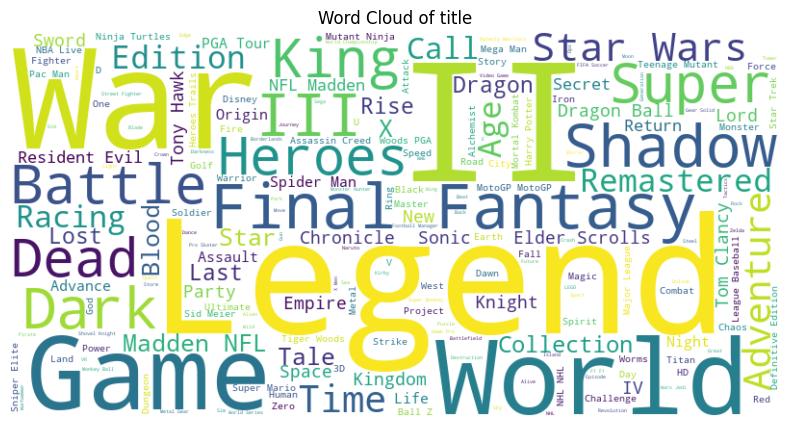

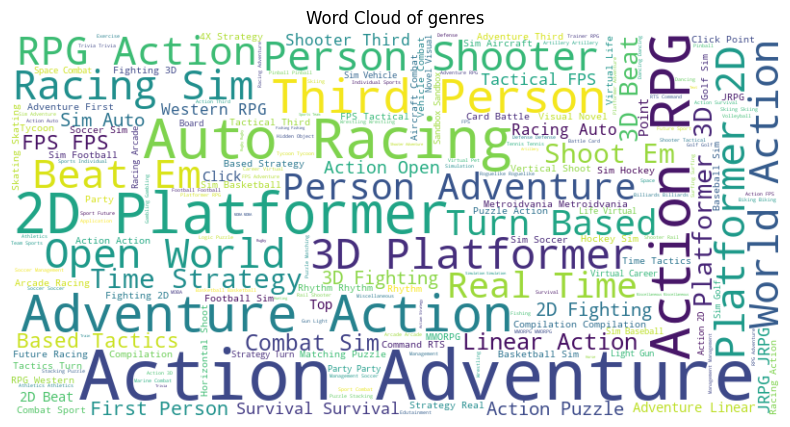

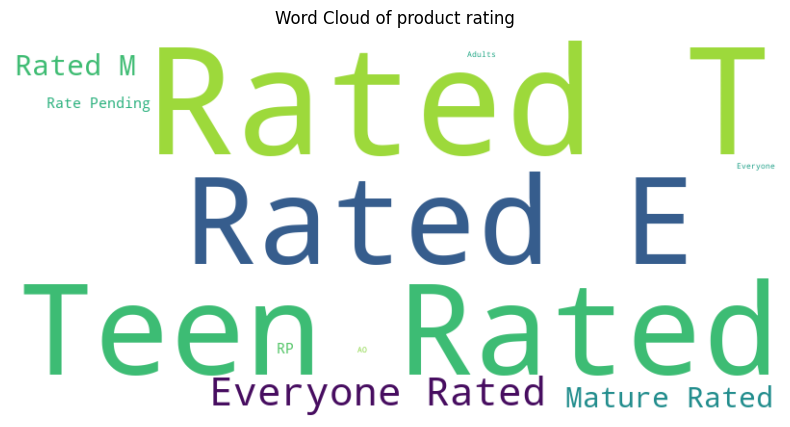

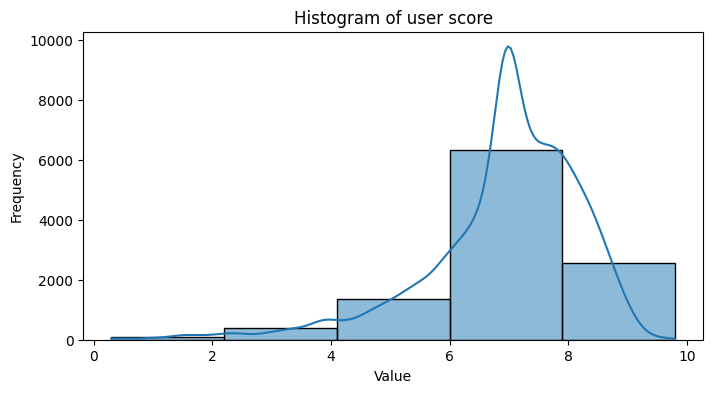

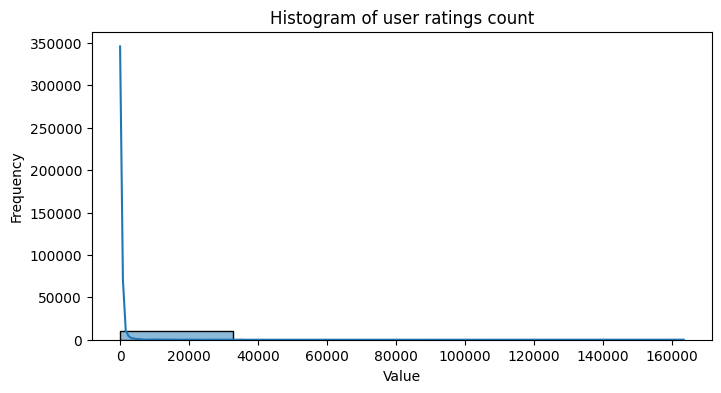

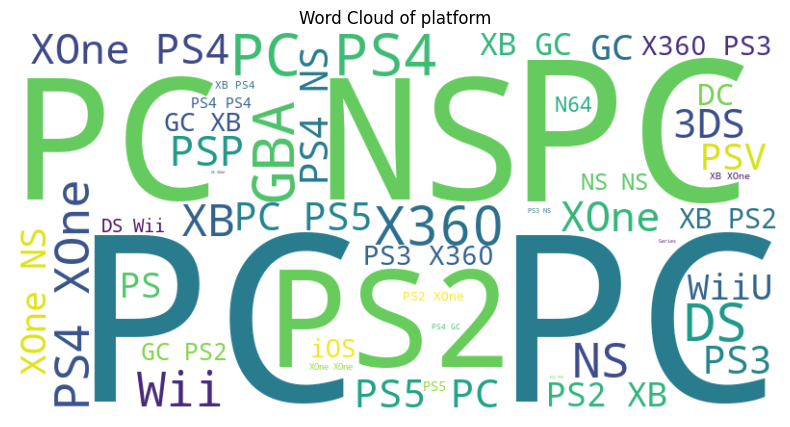

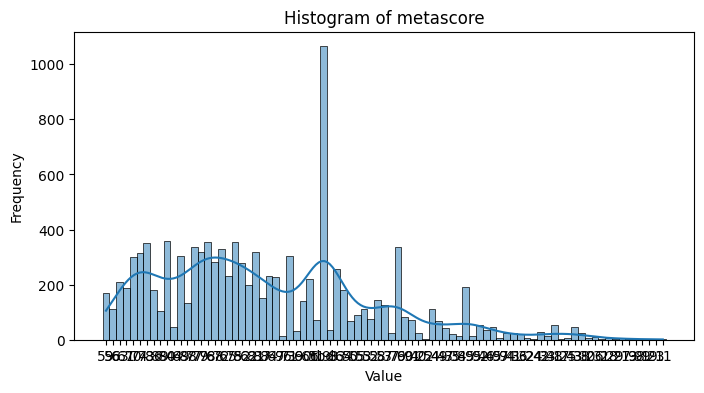

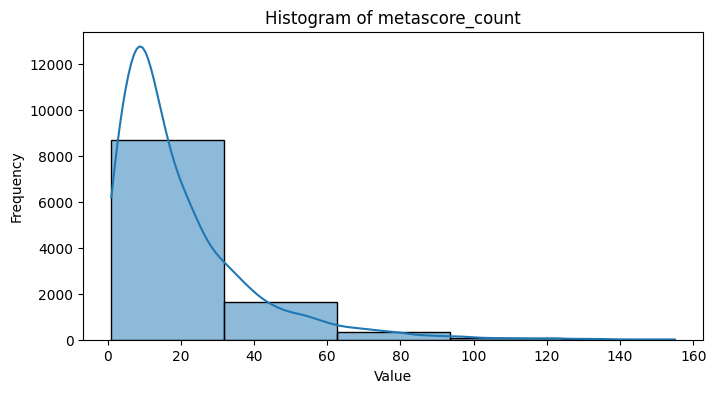

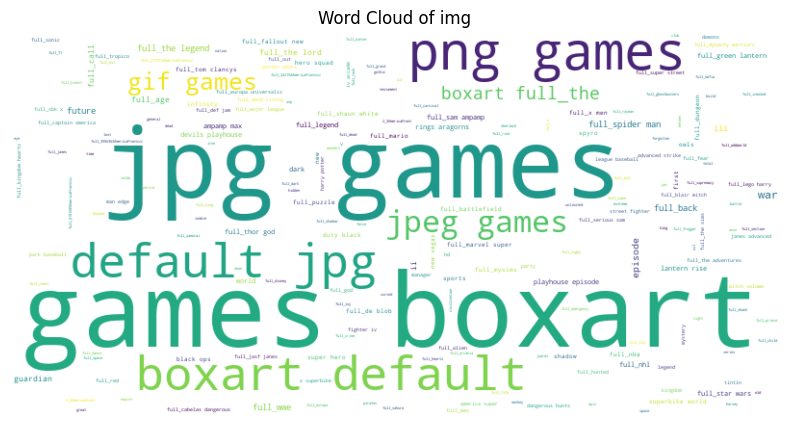

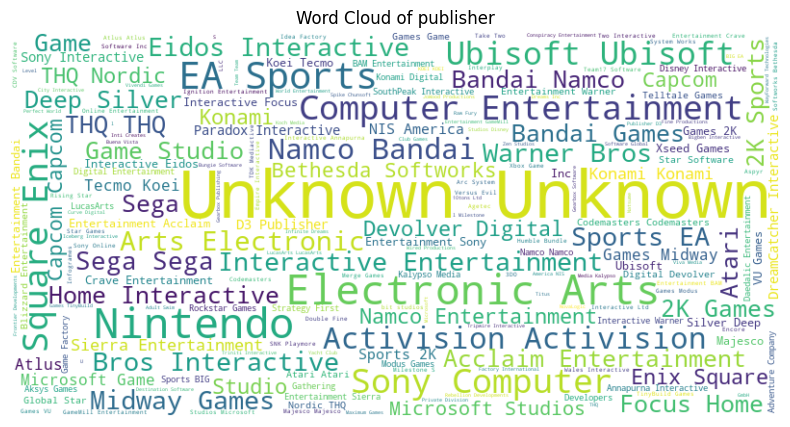

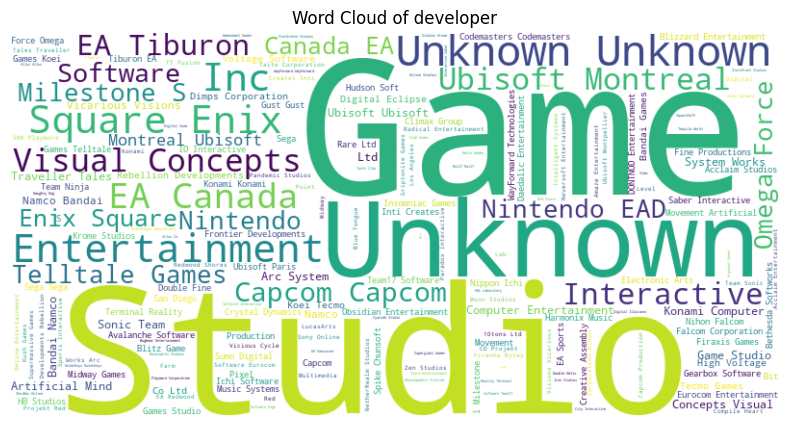

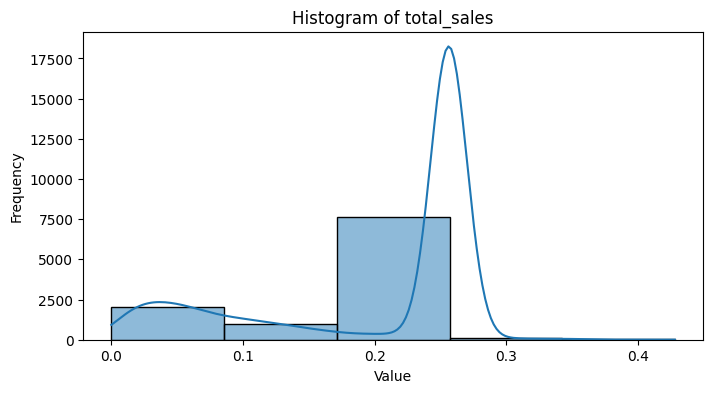

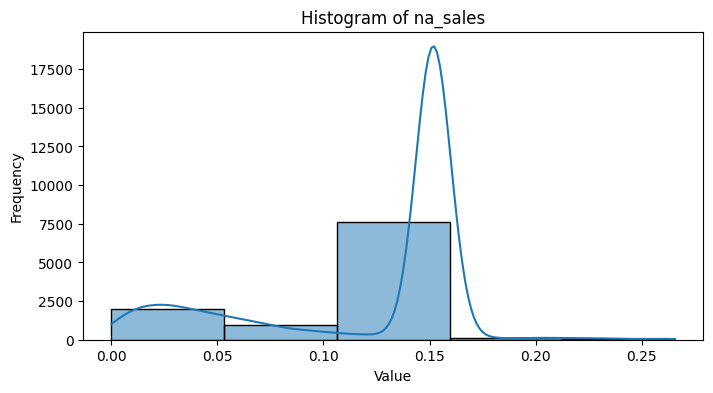

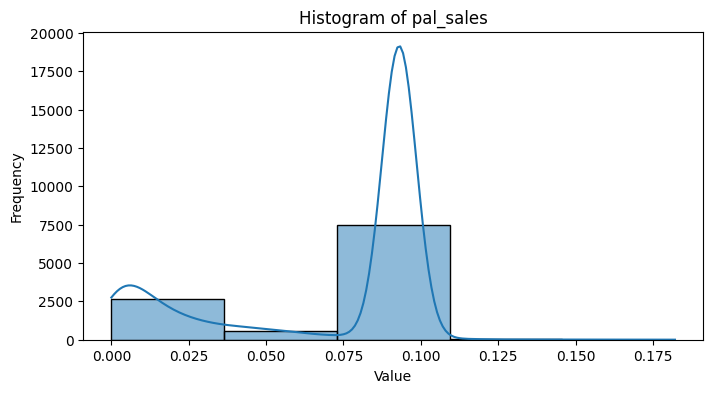

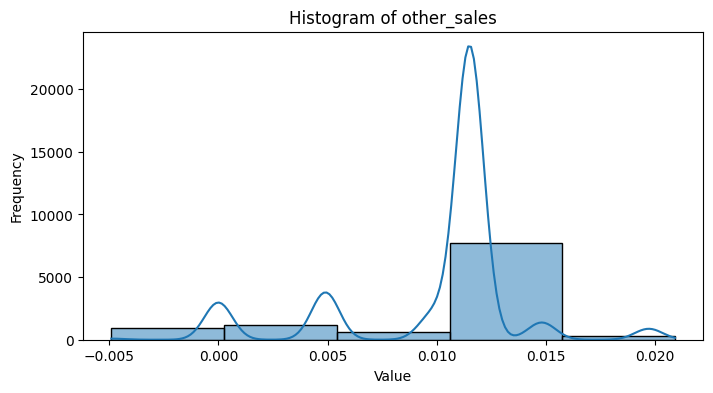

KeyError: 'last_update'

<Figure size 800x400 with 0 Axes>

In [91]:
for column in data.columns:
    visualize(data, column)